# Understanding Descriptive Statistics

Import the necessary libraries here:

In [135]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [15]:
def dice_throw(n):
    throws= {i+1:random.randint(1,6) for i in range(n)}
    return pd.DataFrame.from_dict(throws,orient="index",columns=["throw"])

dice_df=dice_throw(10)
dice_df

,throw
1,6
2,3
3,3
4,5
5,6
6,2
7,4
8,1
9,4
10,5


#### 2.- Plot the results sorted by value.

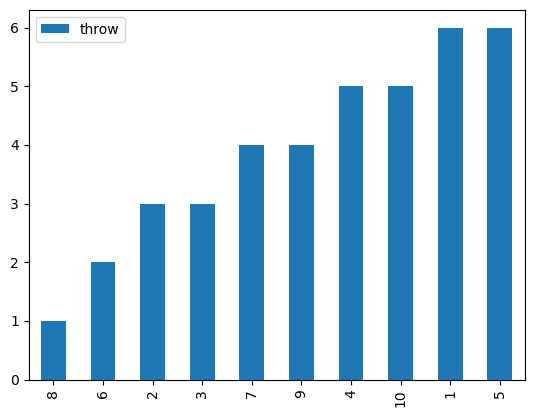

In [22]:
dice_df.sort_values(by="throw").plot(kind="bar",y="throw")
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [37]:
count_throws=dice_df.groupby("throw").agg({"throw":"count"})
count_throws.columns=["count"]
count_throws

,count
throw,
1,1
2,1
3,2
4,2
5,2
6,2


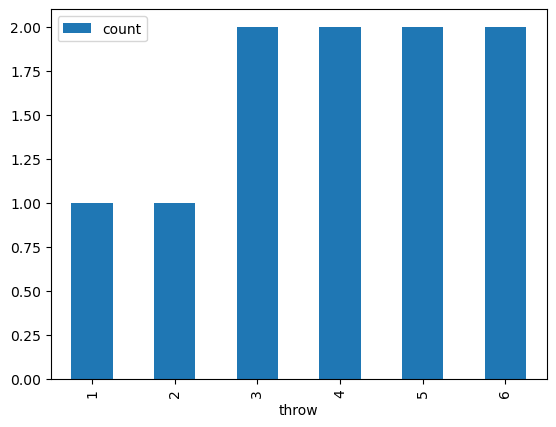

In [38]:
count_throws.plot(kind="bar",y="count")
plt.show()

*Second graph gives us the frequency distribution of the dice throws - how many times each value on the dice was thrown within 10 throws. First graph is just a plot of all thrown values within 10 throws sorted from min to max*

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [49]:
def mean(df):
    return df.sum()/df.count()
mean(dice_df)

throw    3.9
dtype: float64

In [46]:
#just checking values
dice_df["throw"].mean()

3.9

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [52]:
#??? not sure what is being asked but took dataframe with freq distribution from last challenge and applied function from previous exercise
count_throws=dice_df.groupby("throw").agg({"throw":"count"})
mean(count_throws)

throw    1.666667
dtype: float64

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [85]:
def median(list):
    list.sort()
    if len(list)%2!=0:
        return list[int(round(len(list)/2,0))]
    else:
        return (list[int(round(len(list)/2,0))-1] + list[int(round(len(list)/2,0))])/2

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

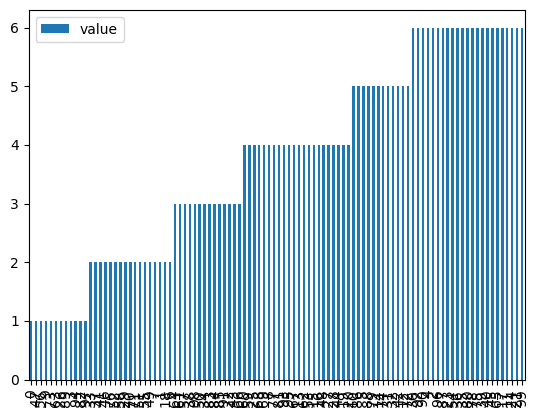

In [94]:
dice_100=pd.read_csv("../data/roll_the_dice_hundred.csv")
dice_100.sort_values(by="value").plot(kind="bar",y="value")
plt.show()

In [104]:
"""
4 and 6 seem to be the more prevailing numbers
"""

'\n4 and 6 seem to be the more prevailing numbers\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [97]:
mean(dice_100["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [99]:
hist=dice_100.groupby("value").agg({"roll":"count"})
hist

,roll
value,
1,12
2,17
3,14
4,22
5,12
6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

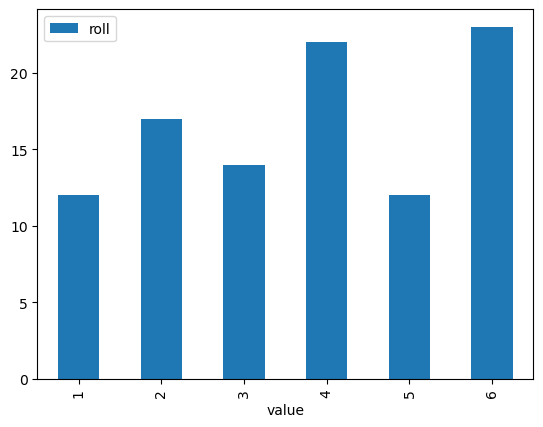

In [102]:
hist.plot(kind="bar",y="roll")
plt.show()

In [106]:
"""
Mean is close to the second most frequent value of the dice throw. Set is unimodal, mode=6. Makes sense given the number of possible combinations to achieve 6 and 4 are the highest in the set
"""

'\nMean is close to the second most frequent value of the dice throw. Set is unimodal, mode=6. Makes sense given the number of possible combinations to achieve 6 and 4 are the highest in the set\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<Axes: >

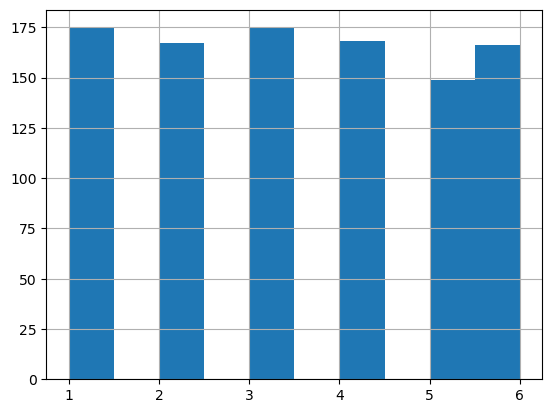

In [113]:
dice_1000=pd.read_csv("../data/roll_the_dice_thousand.csv")
#hist=dice_1000.groupby("value").agg({"roll":"count"})
#hist.plot(kind="bar",y="roll")
#plt.show()
#too complicated................ why?
dice_1000["value"].hist()

In [108]:
"""
With 1000 throws data is more standardised and the frequency trends do not hold anymore.
"""

'\nWith 1000 throws data is more standardised and the frequency trends do not hold anymore.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

array([[<Axes: title={'center': 'observation'}>]], dtype=object)

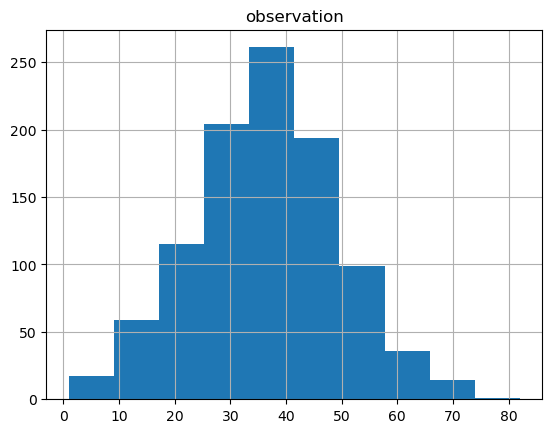

In [111]:
ages=pd.read_csv("../data/ages_population.csv")
ages.hist()


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [117]:
print(ages.mean())
print(ages.std())


observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [118]:
"""
Mean corresponds to expectations, so does standard deviation -- most observations are in the central area
"""

'\nMean corresponds to expectations, so does standard deviation -- most observations are in the central area\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<Axes: title={'center': 'observation'}>]], dtype=object)

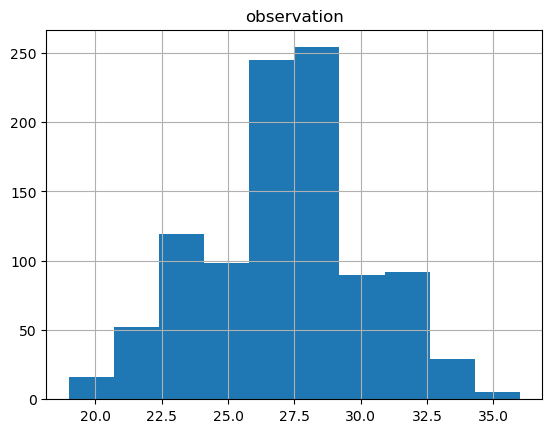

In [120]:
ages2=pd.read_csv("../data/ages_population2.csv")
ages2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [123]:
"""
Mean around 27.5; data more condensed - std lower?"""

'\nMean around 27.5; data more condensed - std lower?'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [124]:
print(ages2.mean())
print(ages2.std())

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [125]:
"""
Easy to guess mean; did not expect standard deviation to be this low"""

'\nEasy to guess mean; did not expect standard deviation to be this low'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<Axes: title={'center': 'observation'}>]], dtype=object)

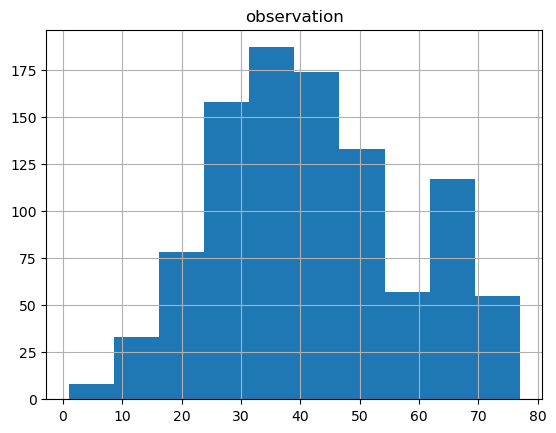

In [126]:
ages3=pd.read_csv("../data/ages_population3.csv")
ages3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [127]:
print(ages3.mean())
print(ages3.std())

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [130]:
"""
Mean age is getting higher, and there seems to be more differentiation within the sample, more age groups included in the study
"""

'\nMean age is getting higher, and there seems to be more differentiation within the sample, more age groups included in the study\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [136]:
q1=np.quantile(ages3,0.25)
print("First quartile is",q1)
q2=np.quantile(ages3,0.5)
print("First quartile is",q2)
q3=np.quantile(ages3,0.75)
print("First quartile is",q3)

First quartile is 30.0
First quartile is 40.0
First quartile is 53.0


In [137]:
"""
Observation re more age groups included in the study confirmed - in age 1 sample, there were very few observations with age of more than 50
"""

'\nObservation re more age groups included in the study confirmed - in age 1 sample, there were very few observations with age of more than 50\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [138]:
q1=np.quantile(ages,0.25)
print("First quartile is",q1)
q2=np.quantile(ages,0.5)
print("First quartile is",q2)
q3=np.quantile(ages,0.75)
print("First quartile is",q3)

First quartile is 25.0
First quartile is 27.0
First quartile is 29.0


In [139]:
"""
In age 1, majority of observations were very close to the mean. In age 3, age groups are more differentiated
"""

'\nIn age 1, majority of observations were very close to the mean. In age 3, age groups are more differentiated\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""